In [23]:
import numpy as np
import skrf as rf
import matplotlib.pyplot as plt
import os

In [29]:
dir_path = '20250609_run39_SLIM32/'

fs = []
for entry in os.listdir(dir_path):
    full_path = os.path.join(dir_path, entry)
    if os.path.isfile(full_path) and entry.endswith(".s2p"):
        fs.append(entry)

print(fs)

['Loopback_4-8.s2p', 'Loopback_atLbracket.s2p', 'Loopback_4-8_LNAoff.s2p', 'Channel3_1-5.s2p', 'Channel1_2-6.s2p', 'Chanel1_2-6_morepts0dBm.s2p']


In [2]:
# Path to your S2P file
network = rf.Network('20250609_run39_SLIM32/Channel1_2-6.s2p')

# Now, the 'network' object contains the S-parameter data and other information
# You can access various properties:
print(f"Frequencies: {network.frequency.f_scaled}") # Frequencies in appropriate units

print(f"Complex S-parameters (S11): {network.s[:, 0, 0]}") # S11 parameters
print(f"Complex S-parameters (S21): {network.s[:, 1, 0]}") # S21 parameters
print(f"Complex S-parameters (S12): {network.s[:, 0, 1]}") # S12 parameters
print(f"Complex S-parameters (S22): {network.s[:, 1, 1]}") # S22 parameters

print(f"Mag [dB] S-parameters (S11): {network.s_db[:, 0, 0]}") # S11 parameters
print(f"Mag [dB] S-parameters (S21): {network.s_db[:, 1, 0]}") # S21 parameters
print(f"Mag [dB] S-parameters (S12): {network.s_db[:, 0, 1]}") # S12 parameters
print(f"Mag [dB] S-parameters (S22): {network.s_db[:, 1, 1]}") # S22 parameters

print(f"Phase [deg] S-parameters (S11): {network.s_deg[:, 0, 0]}") # S11 parameters
print(f"Phase [deg] S-parameters (S21): {network.s_deg[:, 1, 0]}") # S21 parameters
print(f"Phase [deg] S-parameters (S12): {network.s_deg[:, 0, 1]}") # S12 parameters
print(f"Phase [deg] S-parameters (S22): {network.s_deg[:, 1, 1]}") # S22 parameters

Frequencies: [1.50000000e+09 1.50010001e+09 1.50020002e+09 ... 2.49979998e+09
 2.49989999e+09 2.50000000e+09]
Complex S-parameters (S11): [0.01302727-0.01985857j 0.01266008-0.01999309j 0.01240474-0.02039437j ...
 0.0187695 -0.03001902j 0.01846133-0.03011731j 0.01799509-0.03026663j]
Complex S-parameters (S21): [0.00217163-0.00339718j 0.00205825-0.0035292j  0.00189851-0.00375083j ...
 0.00042753+0.00286425j 0.00082987+0.00305144j 0.00082065+0.00299056j]
Complex S-parameters (S12): [-4.87486320e-05-3.08217502e-05j -9.96475002e-06+1.32373068e-05j
 -8.67418117e-05+4.73838478e-05j ...  2.60793077e-05+6.19154339e-05j
 -2.10635301e-06+6.07048470e-05j  1.54813344e-05-1.43900942e-04j]
Complex S-parameters (S22): [-0.13781198+0.03419491j -0.1364994 +0.03854347j -0.13510034+0.04284948j
 ... -0.04991498-0.04454297j -0.05096674-0.04238924j
 -0.0517906 -0.04043796j]
Mag [dB] S-parameters (S11): [-32.486649 -32.518112 -32.442715 ... -29.01898  -29.038296 -29.066162]
Mag [dB] S-parameters (S21): [-47.8

In [3]:
print(network)
print(network.s.shape)

2-Port Network: 'Channel1_2-6',  1500000000.0-2500000000.0 Hz, 10000 pts, z0=[50.+0.j 50.+0.j]
(10000, 2, 2)


In [4]:
# gives complex representation
print(network.s)

# can get the db like this amongst other things
print(network.s_db)

[[[ 1.30272737e-02-1.98585716e-02j -4.87486320e-05-3.08217502e-05j]
  [ 2.17162592e-03-3.39718372e-03j -1.37811979e-01+3.41949068e-02j]]

 [[ 1.26600768e-02-1.99930851e-02j -9.96475002e-06+1.32373068e-05j]
  [ 2.05825448e-03-3.52920089e-03j -1.36499398e-01+3.85434695e-02j]]

 [[ 1.24047432e-02-2.03943691e-02j -8.67418117e-05+4.73838478e-05j]
  [ 1.89851482e-03-3.75082920e-03j -1.35100343e-01+4.28494761e-02j]]

 ...

 [[ 1.87694971e-02-3.00190191e-02j  2.60793077e-05+6.19154339e-05j]
  [ 4.27534980e-04+2.86425423e-03j -4.99149840e-02-4.45429700e-02j]]

 [[ 1.84613310e-02-3.01173089e-02j -2.10635301e-06+6.07048470e-05j]
  [ 8.29866780e-04+3.05143707e-03j -5.09667445e-02-4.23892411e-02j]]

 [[ 1.79950861e-02-3.02666270e-02j  1.54813344e-05-1.43900942e-04j]
  [ 8.20654102e-04+2.99055850e-03j -5.17905994e-02-4.04379573e-02j]]]
[[[-32.486649 -84.780243]
  [-47.889645 -16.954786]]

 [[-32.518112 -95.61422 ]
  [-47.775002 -16.96422 ]]

 [[-32.442715 -80.101334]
  [-47.526878 -16.970594]]

 ...

Text(0.5, 1.0, 'Channel1_2-6')

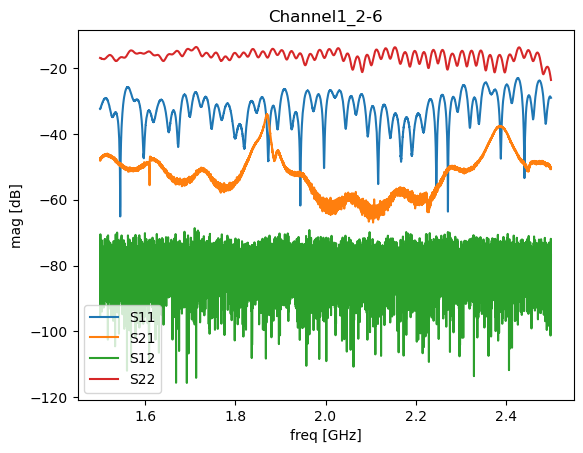

In [33]:
# mag [db]
plt.figure()
plt.plot(network.frequency.f_scaled * 10**-9, network.s_db[:, 0, 0], label = 'S11')
plt.plot(network.frequency.f_scaled * 10**-9, network.s_db[:, 1, 0], label = 'S21')
plt.plot(network.frequency.f_scaled * 10**-9, network.s_db[:, 0, 1], label = 'S12')
plt.plot(network.frequency.f_scaled * 10**-9, network.s_db[:, 1, 1], label = 'S22')
plt.legend(loc = 'best')
plt.xlabel('freq [GHz]')
plt.ylabel('mag [dB]')
plt.title(fs[4][:-4])

# phase
#plt.figure(figsize = (20,4))
#plt.plot(network.frequency.f_scaled, network.s_deg[:, 0, 0], label = 'S11', alpha = 0.5)
#plt.plot(network.frequency.f_scaled, network.s_deg[:, 1, 0], label = 'S21', alpha = 0.5)
#plt.plot(network.frequency.f_scaled, network.s_deg[:, 0, 1], label = 'S12', alpha = 0.5)
#plt.plot(network.frequency.f_scaled, network.s_deg[:, 1, 1], label = 'S22', alpha = 0.5)
#plt.legend(loc = 'best')

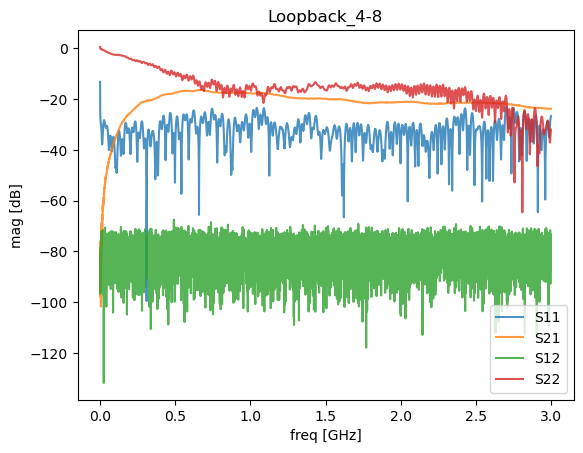

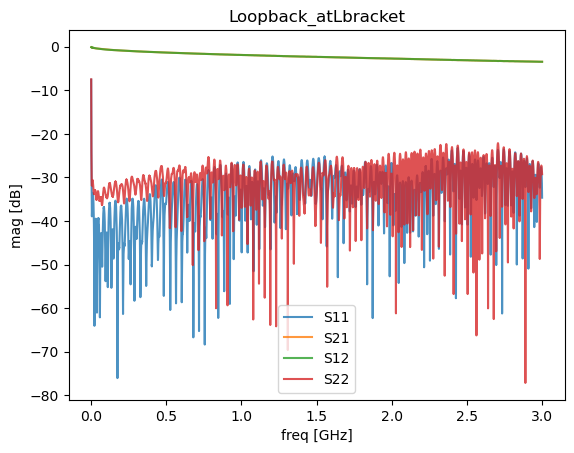

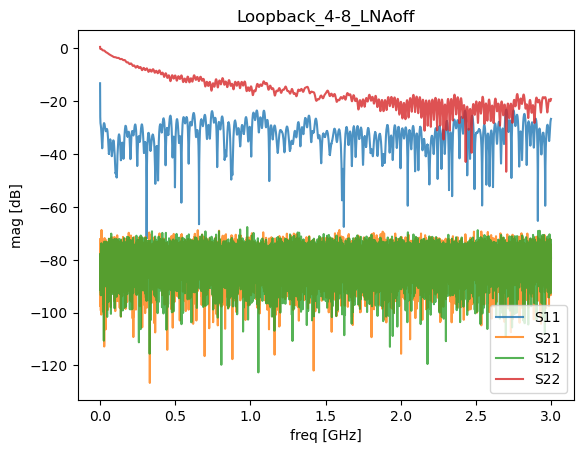

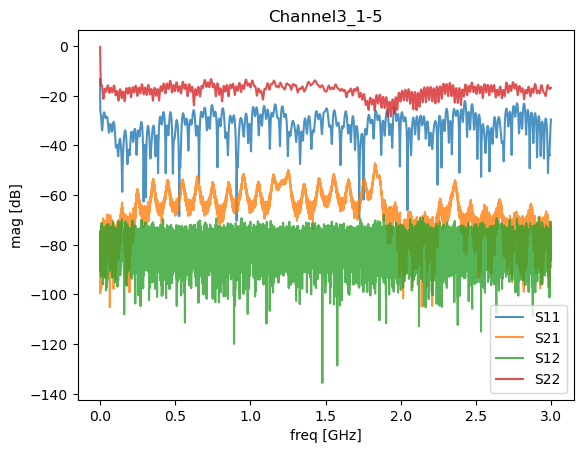

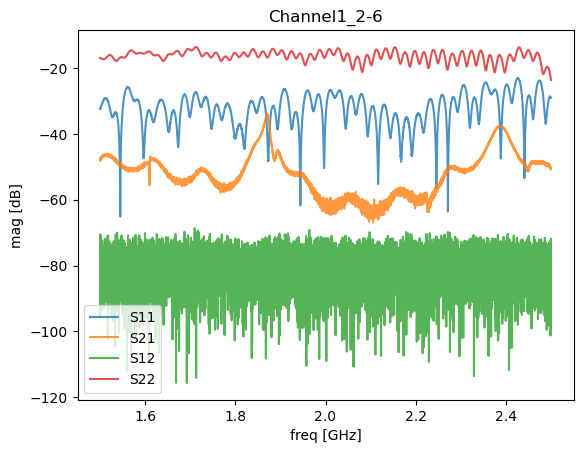

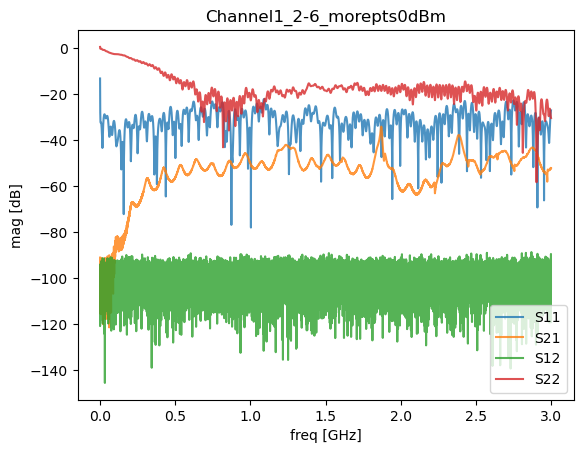

In [44]:
## go through and just plot and save all from the directory

dir_path = '20250609_run39_SLIM32/'
out_path = '20250609_run39_SLIM32/figures/'

for currf in os.listdir(dir_path):
    full_path = os.path.join(dir_path, currf)

    # Create the directory and any necessary parent directories if they don't exist
    os.makedirs(out_path, exist_ok=True)
    
    if os.path.isfile(full_path) and currf.endswith(".s2p"):
        network = rf.Network(full_path)
        # mag [db]
        plt.figure()
        plt.plot(network.frequency.f_scaled * 10**-9, network.s_db[:, 0, 0], label = 'S11', alpha = 0.8)
        plt.plot(network.frequency.f_scaled * 10**-9, network.s_db[:, 1, 0], label = 'S21', alpha = 0.8)
        plt.plot(network.frequency.f_scaled * 10**-9, network.s_db[:, 0, 1], label = 'S12', alpha = 0.8)
        plt.plot(network.frequency.f_scaled * 10**-9, network.s_db[:, 1, 1], label = 'S22', alpha = 0.8)
        plt.legend(loc = 'best')
        plt.xlabel('freq [GHz]')
        plt.ylabel('mag [dB]')
        plt.title(currf[:-4])

        plt.savefig(out_path + currf[:-4] + '_fig.png')
        plt.show()